In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mpld3
import pandas as pd
import scipy.stats as stats
import scipy.optimize as opt
import urllib

%matplotlib inline
mpld3.enable_notebook()

In [6]:
10.8e-3 / 60e-6

180.0

# ELEC2104 Lab 3 - Bipolar Junction Transistors

## Objectives

To obtain an understanding of the large-signal operation of bipolar junction transistors. 

## Part 1: Forced $I_B$ Output Characteristics

The terminals for the 2N3904 NPN BJT are:

<img src='1.png' width=30% />

Connect the collector to DUT+, the emitter to DUT-, and the base to the BASE terminal. Vary the values of $V_C$ and $I_B$ so that multiple IV curves are shown. Label the regions. 

For the base currents $30 \: \mu\textrm{A}$ and $60 \: \mu\textrm{A}$, find the value of $\beta = I_C / I_B$. 

<br>

## Part 2: Voltage Transfer Curve of a BJT Inverter

Construct:

<img src='3.png' width=40% />


The transfer function graph should look something like this:

<img src='2.png' width=80% />

The output voltage starts to drop at an input voltage of around $0.7 \textrm{ V}$, which coincides with the turn on voltage of a silicon PN junction (as used in the transistor used).

The voltage across R2 should look something like:

<img src='4.png' width=80% />

The voltage across R1 should look something like:

<img src='5.png' width=80% />

The voltage between the base and the emitter (ie $V_{BE}$) should look something like:

<img src='6.png' width=80% />


## Part 3: Transistor as a Switch



## Part 4: Estimating the Early Voltage of the BJT

In the linear regression below, the first data point in each series was excluded as they were sometimes outliers.

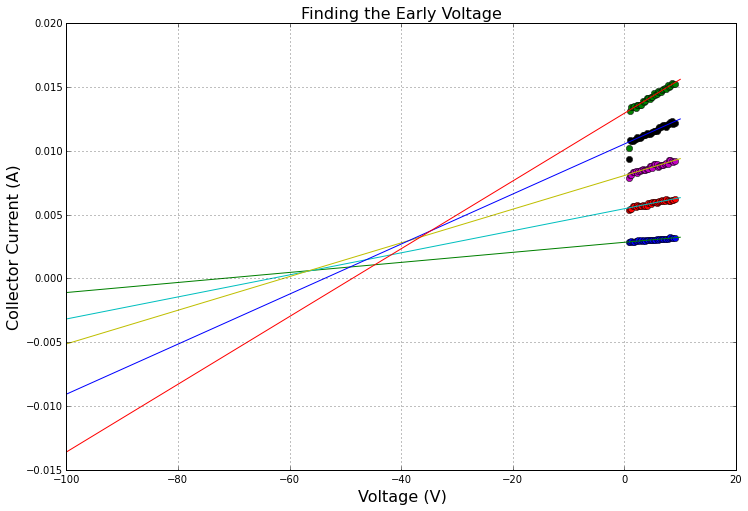

In [16]:
# Get the logged data (after logging and uploading to pastebin or similar)
urllib.request.urlretrieve('http://pastebin.com/raw.php?i=mKSuECKQ', 'bjt_data1.csv')
urllib.request.urlretrieve('http://pastebin.com/raw.php?i=Nna4j6dY', 'bjt_data2.csv')
urllib.request.urlretrieve('http://pastebin.com/raw.php?i=CdKJEhEJ', 'bjt_data3.csv')
urllib.request.urlretrieve('http://pastebin.com/raw.php?i=rJ0DuqUj', 'bjt_data4.csv')
urllib.request.urlretrieve('http://pastebin.com/raw.php?i=wKqEgG4W', 'bjt_data5.csv')

bjt_data1 = pd.read_csv('bjt_data1.csv', names=['v1', 'i1'], index_col=False, delimiter='\t')
bjt_data2 = pd.read_csv('bjt_data2.csv', names=['v2', 'i2'], index_col=False, delimiter='\t')
bjt_data3 = pd.read_csv('bjt_data3.csv', names=['v3', 'i3'], index_col=False, delimiter='\t')
bjt_data4 = pd.read_csv('bjt_data4.csv', names=['v4', 'i4'], index_col=False, delimiter='\t')
bjt_data5 = pd.read_csv('bjt_data5.csv', names=['v5', 'i5'], index_col=False, delimiter='\t')

bjt_data = bjt_data1.join([bjt_data2, bjt_data3, bjt_data4, bjt_data5])

# do linear regression on the lines
# return a function for the fit
def bjt_linear_fit(x, y):
    slope, intercept, *_ = stats.linregress(x, y)
    def bjt_func(x):
        return slope * x + intercept
    return bjt_func

# make the fits
fits = []
for i in range(5):
    fits.append(bjt_linear_fit(bjt_data['v' + str(i + 1)].values[1:], 
                               bjt_data['i' + str(i + 1)].values[1:]))

# now plot the fits AND the data, and find the Early voltage
x = np.linspace(-100, 10, 1000)

fig = plt.figure(figsize=(12, 8))

# plot the data 
for i in range(5):
    xi = bjt_data['v' + str(i + 1)].values
    yi = bjt_data['i' + str(i + 1)].values
    plt.plot(xi, yi, 'o')
    plt.plot(x, fits[i](x))

plt.title('Finding the Early Voltage', fontsize=16)
plt.xlabel('Voltage (V)', fontsize=16)
plt.ylabel('Collector Current (A)', fontsize=16)
plt.grid(b=True)
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition())
    
plt.show()